# Connecting to GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importing Libraries

Installing the feature_engine module to do outlier treatment, duplicate feature removal and correlated feature removal

In [ ]:
!pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import feature_engine as fe
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Reading required data files

In [ ]:
#Read training data file
trainfile = r'/content/drive/MyDrive/CIS508/HW2/Insurance Fraud - TRAIN-3000.csv'
train_data = pd.read_csv(trainfile)

#Read validation data file, test file will be created as a split of the train data
testfile = r'/content/drive/MyDrive/CIS508/HW2/Insurance Fraud -TEST-12900.csv'
test_data = pd.read_csv(testfile)

# Getting sense of the data

In [ ]:
#Looking at data shape
print(train_data.shape)
print(test_data.shape)

(2999, 32)
(12918, 32)


In [ ]:
#Looking at a couple of train data rows
train_data.head(5)

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [ ]:
#Looking at test data
test_data.head(5)

,MONTH,WEEKOFMONTH,DAYOFWEEK,MAKE,ACCIDENTAREA,DAYOFWEEKCLAIMED,MONTHCLAIMED,WEEKOFMONTHCLAIMED,SEX,MARITALSTATUS,...,AGEOFPOLICYHOLDER,POLICEREPORTFILED,WITNESSPRESENT,AGENTTYPE,NUMBEROFSUPPLIMENTS,ADDRESSCHANGE_CLAIM,NUMBEROFCARS,YEAR,BASEPOLICY,FRAUDFOUND
0,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,26_to_30,No,No,External,3_to_5,no_change,1-vehicle,1994,Collision,Yes
1,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,...,over_65,No,No,External,none,no_change,1-vehicle,1994,All_Perils,Yes
2,Jan,1,Monday,Pontiac,Urban,Wednesday,Jan,1,Male,Married,...,41_to_50,No,No,External,none,under_6_months,1-vehicle,1994,All_Perils,Yes
3,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,...,36_to_40,No,No,External,more_than_5,under_6_months,2-vehicles,1994,All_Perils,Yes
4,Dec,5,Wednesday,Pontiac,Urban,Wednesday,Jan,1,Male,Single,...,36_to_40,No,No,External,more_than_5,no_change,1-vehicle,1994,Collision,Yes


In [ ]:
# Checking the balance of dependent variable in the data recieved
train_data['FRAUDFOUND'].value_counts()

#This is a imbalanced class problem, evident from the difference in classes below

No     2600
Yes     399
Name: FRAUDFOUND, dtype: int64

In [ ]:
#Checking for null values in each column
(train_data.isnull().sum()*100/len(train_data)).sort_values(ascending = False)
#the dataset does not have any null values

MONTH                   0.0
WEEKOFMONTH             0.0
BASEPOLICY              0.0
YEAR                    0.0
NUMBEROFCARS            0.0
ADDRESSCHANGE_CLAIM     0.0
NUMBEROFSUPPLIMENTS     0.0
AGENTTYPE               0.0
WITNESSPRESENT          0.0
POLICEREPORTFILED       0.0
AGEOFPOLICYHOLDER       0.0
AGEOFVEHICLE            0.0
PASTNUMBEROFCLAIMS      0.0
DAYS_POLICY_CLAIM       0.0
DAYS_POLICY_ACCIDENT    0.0
DRIVERRATING            0.0
DEDUCTIBLE              0.0
REPNUMBER               0.0
VEHICLEPRICE            0.0
VEHICLECATEGORY         0.0
POLICYTYPE              0.0
FAULT                   0.0
AGE                     0.0
MARITALSTATUS           0.0
SEX                     0.0
WEEKOFMONTHCLAIMED      0.0
MONTHCLAIMED            0.0
DAYOFWEEKCLAIMED        0.0
ACCIDENTAREA            0.0
MAKE                    0.0
DAYOFWEEK               0.0
FRAUDFOUND              0.0
dtype: float64

In [ ]:
(test_data.isnull().sum()*100/len(test_data)).sort_values(ascending = False)

MONTH                   0.0
WEEKOFMONTH             0.0
BASEPOLICY              0.0
YEAR                    0.0
NUMBEROFCARS            0.0
ADDRESSCHANGE_CLAIM     0.0
NUMBEROFSUPPLIMENTS     0.0
AGENTTYPE               0.0
WITNESSPRESENT          0.0
POLICEREPORTFILED       0.0
AGEOFPOLICYHOLDER       0.0
AGEOFVEHICLE            0.0
PASTNUMBEROFCLAIMS      0.0
DAYS_POLICY_CLAIM       0.0
DAYS_POLICY_ACCIDENT    0.0
DRIVERRATING            0.0
DEDUCTIBLE              0.0
REPNUMBER               0.0
VEHICLEPRICE            0.0
VEHICLECATEGORY         0.0
POLICYTYPE              0.0
FAULT                   0.0
AGE                     0.0
MARITALSTATUS           0.0
SEX                     0.0
WEEKOFMONTHCLAIMED      0.0
MONTHCLAIMED            0.0
DAYOFWEEKCLAIMED        0.0
ACCIDENTAREA            0.0
MAKE                    0.0
DAYOFWEEK               0.0
FRAUDFOUND              0.0
dtype: float64

# Label Encoding and Redundant Feature elimination

Before getting into row tranformations for our data, let's eliminate variables that are not adding any value to the prediction and keep the ones that help predict the dependent variable

In [ ]:
# Creating the set of dependent and independent variables for test and train data
X_train = train_data.drop(labels = "FRAUDFOUND", axis = 1)
y_train = train_data["FRAUDFOUND"]
X_test = test_data.drop(labels = "FRAUDFOUND", axis = 1)
y_test = test_data["FRAUDFOUND"]

In [ ]:
# lets encode columns that are in object form for ease of mathematical operations
obj_columns = ['MONTH','DAYOFWEEK','MAKE','ACCIDENTAREA','DAYOFWEEKCLAIMED','MONTHCLAIMED','SEX','MARITALSTATUS','FAULT','POLICYTYPE',
'VEHICLECATEGORY','VEHICLEPRICE',
'DAYS_POLICY_ACCIDENT',
'DAYS_POLICY_CLAIM',
'PASTNUMBEROFCLAIMS',
'AGEOFVEHICLE',
'AGEOFPOLICYHOLDER',
'POLICEREPORTFILED',
'WITNESSPRESENT',
'AGENTTYPE',
'NUMBEROFSUPPLIMENTS',
'ADDRESSCHANGE_CLAIM',
'NUMBEROFCARS',
'BASEPOLICY',
]
X_train = pd.get_dummies(X_train, columns = obj_columns)
X_test = pd.get_dummies(X_test, columns = obj_columns)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2999, 139)
(12918, 144)


In [ ]:
# Filtering test data to have the same columns as train data
train_cols = list(X_train.columns)
X_test = X_test[train_cols]

print(X_train.shape)
print(X_test.shape)

(2999, 139)
(12918, 139)


In [ ]:
# Detecting and removing variables that have almost no variance, as these will not be able to predict the customer satifaction
# Lets say variables with no variance are constant variables, the ones that we need to drop
from sklearn.feature_selection import VarianceThreshold
const_model = VarianceThreshold(threshold=0)
const_model.fit(X_train)

VarianceThreshold(threshold=0)

In [ ]:
# get_support() is a variable that indicates whether a variable is constant or not(0 for constant and 1 for not)
# Lets see how many and which variables are constant
print("Number of constant variables:",X_train.shape[1]-sum(const_model.get_support()))

print("Constant variables:")
[x for x in X_train.columns if x not in X_train.columns[const_model.get_support()]]

Number of constant variables: 0
Constant variables:


[]

# Data EDA + Transformation

**We're going to perform the following checks on the data as a combined process of cleaning it as well as understanding it. Transformation of data will be done as and when necessary.**

As noticed before, this dataset has a major class imbalance. We can either  under-sample majority class or over-sample minority class to extract good results from our model. Let's pick oversampling.

## Data Sampling

In [ ]:
# Using the imblearn module python library, to undersample the data
!pip install imbalanced-learn
import imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train, y_train = oversample.fit_resample(X_train, y_train)

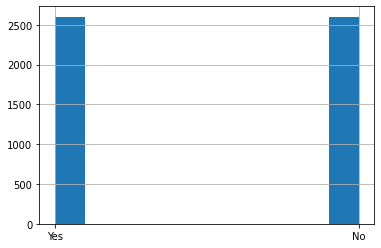

In [ ]:
y_train.hist()

The classes look pretty balanced now

## Data Transformation

Using train_data to do the following tranformations:
1. Drop duplicate and correlated features
2. Feature selection

In [ ]:
# Drop duplicate and correlated variables
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import DropCorrelatedFeatures

transformer = DropDuplicateFeatures()
transformer.fit(X_train)
X = transformer.transform(X_train)

tr = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
X_train = tr.fit_transform(X_train)

X_train.shape

(5200, 124)

In [ ]:
# Selecting top features
from sklearn.feature_selection import SelectFromModel
fs = SelectFromModel(DecisionTreeClassifier(), max_features=100)

# learn relationship from training data
fs.fit(X_train, y_train)

# transform train input data
feature_idx = fs.get_support()
feature_name = X_train.columns[feature_idx]
X_train = fs.transform(X_train)
X_train = pd.DataFrame(X_train, columns = feature_name)

In [ ]:
X_train.shape

(5200, 30)

Looking at the correlation plot of the variables

In [ ]:
corrmatrix = X_train.corr()

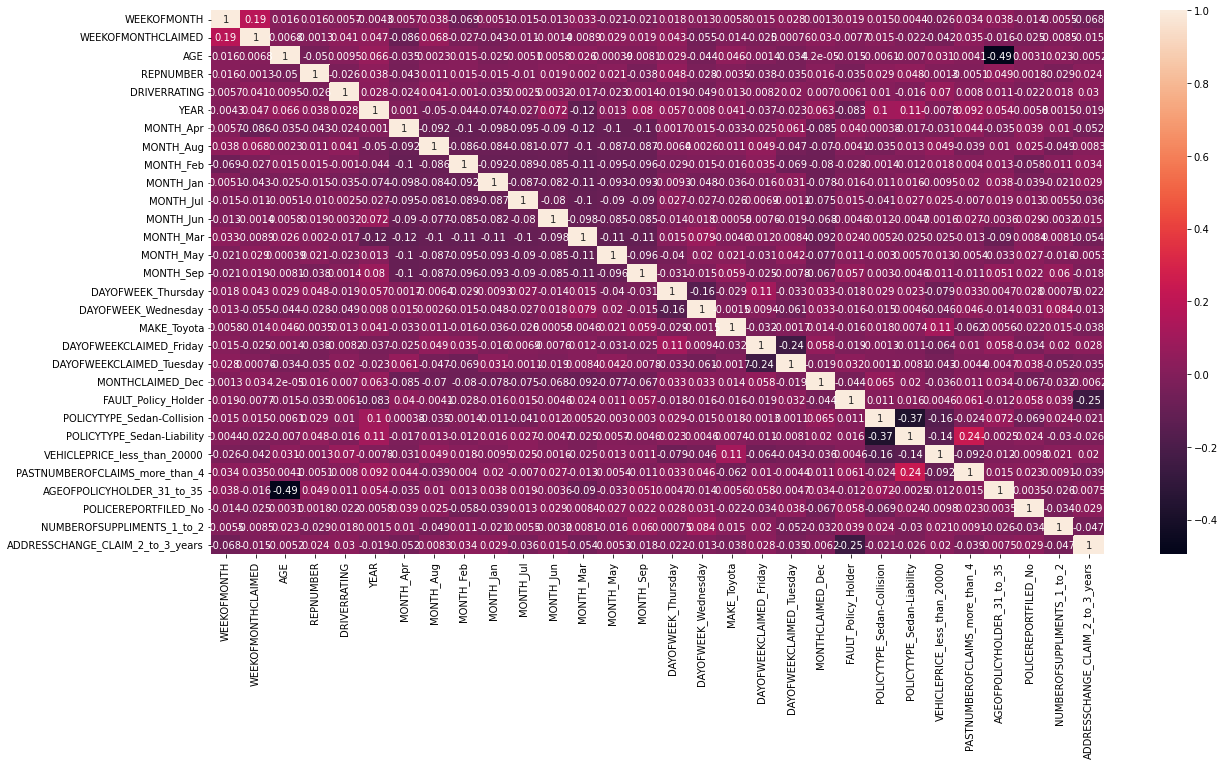

In [ ]:
corrmatrix = X_train.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sn.heatmap(corrmatrix, annot=True)
plt.show()

Checking variable importance ranks

Feature: 0, Score: 0.04079
Feature: 1, Score: 0.03404
Feature: 2, Score: 0.10080
Feature: 3, Score: 0.06547
Feature: 4, Score: 0.03026
Feature: 5, Score: 0.07497
Feature: 6, Score: 0.01476
Feature: 7, Score: 0.01858
Feature: 8, Score: 0.01610
Feature: 9, Score: 0.01709
Feature: 10, Score: 0.01663
Feature: 11, Score: 0.01850
Feature: 12, Score: 0.02767
Feature: 13, Score: 0.01567
Feature: 14, Score: 0.01998
Feature: 15, Score: 0.01163
Feature: 16, Score: 0.01140
Feature: 17, Score: 0.01485
Feature: 18, Score: 0.01087
Feature: 19, Score: 0.00833
Feature: 20, Score: 0.01506
Feature: 21, Score: 0.12028
Feature: 22, Score: 0.01326
Feature: 23, Score: 0.18107
Feature: 24, Score: 0.00879
Feature: 25, Score: 0.01021
Feature: 26, Score: 0.00740
Feature: 27, Score: 0.00825
Feature: 28, Score: 0.00458
Feature: 29, Score: 0.06271


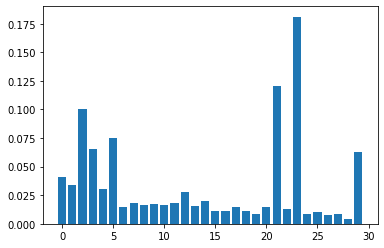

In [ ]:
# model to calculate variable importance
model = DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Decision Tree Classifier

## Hyperparameter Tuning

We will do a hyperparameter tuning to select the best configuration for the model

### GridSearch Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning to select the best model configuration

start_time = time.time() ## To check how long the tuning runs for, start of time
grid = {
'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(5,20,5),'criterion':['gini','entropy']
}

dt_class = DecisionTreeClassifier()

hp_tuning = GridSearchCV(estimator = dt_class, param_grid = grid, cv = 10) ## to try optimising for 'f1', 'roc_auc', 'balanced_accuracy','recall'

hp_tuning.fit(X_train, y_train)

best_params_dict = hp_tuning.best_params_

print(time.time()-start_time) ## To check how long the tuning runs for, end of time
print(best_params_dict)

9.653667449951172
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10}


### RandomSearch Hyperparameter Tuning


In [ ]:
start_time = time.time()

grid = {
'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(5,30,2),'criterion':['gini','entropy']
}

dt_class = DecisionTreeClassifier()

hp_tuning = RandomizedSearchCV(estimator = dt_class, param_distributions = grid, n_iter = 100)

hp_tuning.fit(X_train, y_train)

best_params_dict = hp_tuning.best_params_

print(best_params_dict)
print(time.time()-start_time)

{'min_samples_leaf': 10, 'max_depth': 29, 'criterion': 'entropy'}
8.729012250900269


## Final Iteration of Model Build and Prediction on Test Data

In [ ]:
# Building model with the best parameters achieved from the hyperparameter tuning
dtree2 = DecisionTreeClassifier(min_samples_leaf = best_params_dict['min_samples_leaf']
           ,max_depth = best_params_dict['max_depth']
           ,criterion = best_params_dict['criterion'])

dtree2.fit(X_train, y_train)
#tree.plot_tree(dtree2)

DecisionTreeClassifier(criterion='entropy', max_depth=29, min_samples_leaf=10)

## Accuracy Check on Test data

In [ ]:
train_cols = list(X_train.columns)
X_test = X_test[train_cols]

In [ ]:
# Predicting on test data and checking validation metrics
#y_pred = dtree2.predict(X_test)
y_pred = dtree2.predict_proba(X_test)

y_pred = pd.DataFrame(y_pred)
threshold = 0.75 # You can play on this value (default is 0.5)
y_pred = y_pred[1].apply(lambda el: 'Yes' if el >= threshold else 'No')

print("Accuracy: ",round(accuracy_score(y_test,y_pred)*100,2),'%')
print("Precision: ",round(precision_score(y_test,y_pred,pos_label='Yes')*100,2),'%')
print("Recall: ",round(recall_score(y_test,y_pred, pos_label = 'Yes')*100,2),'%')
print("F1 Score: ",round(f1_score(y_test,y_pred, pos_label = 'Yes')*100,2),'%')

print(metrics.classification_report(y_test, y_pred))

Accuracy:  87.11 %
Precision:  19.34 %
Recall:  73.9 %
F1 Score:  30.65 %
              precision    recall  f1-score   support

          No       0.99      0.88      0.93     12420
         Yes       0.19      0.74      0.31       498

    accuracy                           0.87     12918
   macro avg       0.59      0.81      0.62     12918
weighted avg       0.96      0.87      0.90     12918



In [ ]:
# Creating the final output file
final_df = pd.DataFrame
final_df = y_pred
final_df = pd.merge(X_test['ID'],final_df,how = 'left',left_index = True, right_index = True).merge(y_test)

Exporting the file

In [ ]:
from google.colab import files
final_df.to_csv('FraudDetection_Dtree.csv') 
files.download('FraudDetection_Dtree.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# RandomForest Classifier

## Hyperparameter Tuning

We will do a hyperparameter tuning to select the best configuration for the model

### GridSearch Hyperparameter Tuning

In [ ]:
start_time = time.time()

grid = {
'min_samples_leaf' : range(10,50,10),'max_depth': 
            range(5,20,5),'criterion':['gini','entropy']
}

rf_class = RandomForestClassifier()

hp_tuning = GridSearchCV(estimator = rf_class, param_grid = grid, cv = 10)

hp_tuning.fit(X_train, y_train)

best_params_dict = hp_tuning.best_params_

print(best_params_dict)
print(time.time()-start_time)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 10}
68.5397777557373


### RandomSearch Hyperparameter Tuning

In [ ]:
start_time = time.time()

grid = {
'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(5,30,2),'criterion':['gini','entropy']
}

rf_class = RandomForestClassifier()

hp_tuning = RandomizedSearchCV(estimator = rf_class, param_distributions = grid, n_iter = 100)

hp_tuning.fit(X_train, y_train)

best_params_dict = hp_tuning.best_params_

print(best_params_dict)
print(time.time()-start_time)

{'min_samples_leaf': 10, 'max_depth': 27, 'criterion': 'entropy'}
122.5972216129303


Building the model

In [ ]:
dtree2 = RandomForestClassifier(min_samples_leaf = best_params_dict['min_samples_leaf']
           ,max_depth = best_params_dict['max_depth']
           ,criterion = best_params_dict['criterion'])

dtree2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_leaf=10)

Predicting on test

In [ ]:
train_cols = list(X_train.columns)
X_test = X_test[train_cols]

y_pred = dtree2.predict(X_test)

Model Accuracy Check

In [ ]:
# Predicting on test data and checking validation metrics
#y_pred = dtree2.predict(X_test)
y_pred = dtree2.predict_proba(X_test)

y_pred = pd.DataFrame(y_pred)
threshold = 0.65 # You can play on this value (default is 0.5)
y_pred = y_pred[1].apply(lambda el: 'Yes' if el >= threshold else 'No')


print("Accuracy: ",round(accuracy_score(y_test,y_pred)*100,2),'%')
print("Precision: ",round(precision_score(y_test,y_pred,pos_label='Yes')*100,2),'%')
print("Recall: ",round(recall_score(y_test,y_pred, pos_label = 'Yes')*100,2),'%')
print("F1 Score: ",round(f1_score(y_test,y_pred, pos_label = 'Yes')*100,2),'%')

print(metrics.classification_report(y_test, y_pred))

Accuracy:  87.47 %
Precision:  19.15 %
Recall:  69.88 %
F1 Score:  30.06 %
              precision    recall  f1-score   support

          No       0.99      0.88      0.93     12420
         Yes       0.19      0.70      0.30       498

    accuracy                           0.87     12918
   macro avg       0.59      0.79      0.62     12918
weighted avg       0.96      0.87      0.91     12918



Exporting the file

In [ ]:
# Creating the final output file
final_df = pd.DataFrame
final_df = y_pred
final_df = pd.merge(X_test['ID'],final_df,how = 'left',left_index = True, right_index = True).merge(y_test)

In [ ]:
from google.colab import files
final_df.to_csv('FraudDetection_RF.csv') 
files.download('FraudDetection_RF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>